<font size=6>集成学习</font>
# 概述
## 原理
集成学习(ensemble learning)可以说是现在非常火爆的机器学习方法了。它本身不是一个单独的机器学习算法，而是通过构建并结合多个机器学习器来完成学习任务。也就是我们常说的“博采众长”。集成学习可以用于分类问题集成，回归问题集成，特征选取集成，异常点检测集成等等，可以说所有的机器学习领域都可以看到集成学习的身影。

**组成：**
1. 若干个个体学习器
2. 结合策略
<img width=60% src="images/9113eb778da49f32c749dbc3c34fa412.png">

## 个体学习器
**两种个体学习器组合：**
1. 同质个体学习器：所有的个体学习器都是一个种类的，或者说是同质的；
    1. 个体学习串行
    2. 个体学习并行
2. 异质个体学习器：所有的个体学习器不全是一个种类的；

### bagging
bagging属于同质个体学习器，个体学习器之间没有依赖关系，并行组合。从训练集进行子抽样组成每个基模型所需要的子训练集，对所有基模型预测的结果进行综合产生最终的预测结果：
<img src="images/9edf53941bf363de1fb186433cce6e28_hd.jpg">

**自助采样法（Bootstrap sampling）**

自助法顾名思义，是这样一种方法：即从样本自身中再生成很多可用的同等规模的新样本，从自己中产生和自己类似的，所以叫做自助，即不借助其他样本数据。例如，对于m个样本的原始训练集，我们每次先随机采集一个样本放入采样集，接着把该样本放回，也就是说下次采样时该样本仍有可能被采集到，这样采集m次，最终可以得到m个样本的采样集，由于是随机采样，这样每次的采样集是和原始训练集不同的，和其他采样集也是不同的

**随机森林**

是bagging的一个特化进阶版，所谓的特化是因为随机森林的弱学习器都是决策树。所谓的进阶是随机森林在bagging的样本随机采样基础上，又加上了特征的随机选择，其基本思想没有脱离bagging的范畴。

### boosting
boosting组合算法的训练过程为阶梯状，基模型（个体学习器）按次序一一进行训练（即串行，但是实现上可以做到并行），基模型的训练集按照某种策略每次都进行一定的转化。最后采用综合算法对所有基模型预测的结果进行综合产生最终的预测结果。
<img src="images/10ebb74ac1a0c5bf03f890f3502c9095_hd.jpg">

Boosting系列算法里最著名算法主要有AdaBoost算法和提升树(boosting tree)系列算法。提升树系列算法里面应用最广泛的是梯度提升树(Gradient Boosting Decison Tree即GBDT)。

### stacking
将训练好的所有基模型对训练集进行预测，第j个基模型对第i个训练样本的预测值将作为新的训练集中第i个样本的第j个特征值，最后基于新的训练集进行训练。同理，预测的过程也要先经过所有基模型的预测形成新的测试集，最后再对测试集进行预测。stacking算法在个体学习器可是同质的也可以是异质的，某种程度来说，stacking算法类似于支持向量机的核函数，起到对训练集做升维降维的作用。
<img src="images/c0ab04181bfadb224e1b3cf058380de1_hd.jpg">

## 结合策略
假设我们得到了T个弱学习器（也叫个体学习器或基学习器），即$\{h_1,h_2,...h_T\}$
### 平均法
对于数值类的回归预测问题，通常使用的结合策略是平均法，即，对于若干个弱学习器的输出进行平均得到最终的预测输出。

1. 最简单的平均是算术平均：$H(x) = \frac{1}{T}\sum\limits_{1}^{T}h_i(x)$
2. 如果每个个体学习器有一个权重w，则最终预测是$H(x) = \sum\limits_{i=1}^{T}w_ih_i(x),w_i \geq 0 ,\;\;\; \sum\limits_{i=1}^{T}w_i = 1$

### 投票法
对于分类问题的预测，我们通常使用的是投票法。假设我们的预测类别是$\{c_1,c_2,...c_K\}$，对于任意一个预测样本x，我们的$T$个弱学习器的预测结果分别是$(h_1(x), h_2(x)...h_T(x))$。
1. 相对多数投票法，也就是$T$个弱学习器的对样本$x$的预测结果中，数量最多的类别$c_i$为最终的分类类别；
2. 绝对多数投票法，即，在相对多数投票法的基础上，不光要求获得最高票，还要求票过半数。否则会拒绝预测；
3. 加权投票法，和加权平均法一样，每个弱学习器的分类票数要乘以一个权重，最终将各个类别的加权票数求和，最大的值对应的类别为最终类别；

### 学习法
对于学习法，代表方法是stacking，当使用stacking的结合策略时， 我们不是对弱学习器的结果做简单的逻辑处理，而是再加上一层学习器，也就是说，我们将训练集弱学习器的学习结果作为输入，将训练集的输出作为输出，重新训练一个学习器来得到最终结果。

# 随机森林
随机森林是bagging算法中最常用的算法，它可以很方便的并行训练。
## bagging算法流程
输入为样本集：$D=\{(x_,y_1),(x_2,y_2), ...(x_m,y_m)\}$，弱学习器算法, 弱分类器迭代次数$T$。

输出为最终的强分类器$f(x)$

流程：
1. 遍历$T$次：
    1. 对训练集进行第$t$次自助采样，即，有放回的随机采样，共采集$m$次，得到包含$m$个样本的采样集$D_t$；
    2. 用采样集$D_t$训练第$t$个弱学习器$G_t(x)$
2. 综合策略：
    1. 如果是分类算法预测，则$T$个弱学习器投出最多票数的类别或者类别之一为最终类别；
    2. 如果是回归算法，$T$个弱学习器得到的回归结果进行算术平均得到的值为最终的模型输出。

## 随机森林算法
随机森林(Random Forest,简称RF)是bagging算法的进化版，进化体现如下：
1. RF使用了CART决策树作为弱学习器；
2. RF对决策树的建立做了改进。对于普通的决策树，我们会在节点上所有的$n$个样本特征中选择一个最优的特征来做决策树的左右子树划分，但是RF通过随机选择节点上的一部分样本特征，这个数字小于$n$，假设为$n_{sub}$，然后在这些随机选择的$n_{sub}$个样本特征中，选择一个最优的特征来做决策树的左右子树划分。这样进一步增强了模型的泛化能力。

**算法流程：**

输入为样本集：$D=\{(x_,y_1),(x_2,y_2), ...(x_m,y_m)\}$~~，<font color="red">弱学习器算法</font>~~, 弱分类器迭代次数$T$。

输出为最终的强分类器$f(x)$

流程：
1. 遍历$T$次：
    1. 对训练集进行第$t$次自助采样，即，有放回的随机采样，共采集$m$次，得到包含$m$个样本的采样集$D_t$；
    2. 用采样集$D_t$训练第$t$个弱学习器$G_t(x)$，<font color="red">在训练决策树模型的节点的时候， 在节点上所有的样本特征中选择一部分样本特征， 在这些随机选择的部分样本特征中选择一个最优的特征来做决策树的左右子树划分</font>；
2. 综合策略：
    1. 如果是分类算法预测，则$T$个弱学习器投出最多票数的类别或者类别之一为最终类别；
    2. 如果是回归算法，$T$个弱学习器得到的回归结果进行算术平均得到的值为最终的模型输出。

## 随机森林总结
优点：
1. 训练可以高度并行化；
2. 由于可以随机选择决策树节点划分特征，这样在样本特征维度很高的时候，仍然能高效的训练模型；
3. 在训练后，可以给出各个特征对于输出的重要性；
4. 由于采用了随机采样，训练出的模型的方差小，泛化能力强。
6. 对部分特征缺失不敏感。

缺点：
1. 在某些噪音比较大的样本集上，RF模型容易陷入过拟合。
2. 取值划分比较多的特征容易对RF的决策产生更大的影响，从而影响拟合的模型的效果。

## scikit-learn随机森林类库
在scikit-learn中，RF的分类类是RandomForestClassifier，回归类是RandomForestRegressor。

RF需要调参的参数包括两部分，第一部分是Bagging框架的参数，第二部分是CART决策树的参数。
### RF框架参数
1. n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，计算量会太大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以一般选择一个适中的数值。默认是100。
2. oob_score :即是否采用袋外样本来评估模型的好坏。默认识False。推荐设置为True，因为袋外分数反应了一个模型拟合后的泛化能力。
3. criterion: 即CART树做划分时对特征的评价标准。分类模型和回归模型的损失函数是不一样的。分类RF对应的CART分类树默认是基尼系数gini,另一个可选择的标准是信息增益。回归RF对应的CART回归树默认是均方差mse，另一个可以选择的标准是绝对值差mae。一般来说选择默认的标准就已经很好的。


### RF决策树参数
1. RF划分时考虑的最大特征数max_features。
2. 决策树最大深度max_depth。
3. 内部节点再划分所需最小样本数min_samples_split。
4. 叶子节点最少样本数min_samples_leaf。
5. 叶子节点最小的样本权重和min_weight_fraction_leaf。
6. 最大叶子节点数max_leaf_nodes。
7. 节点划分最小不纯度min_impurity_split。

上面决策树参数中最重要的包括最大特征数max_features， 最大深度max_depth， 内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf。

## 案例
### 分类等高线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  datasets
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

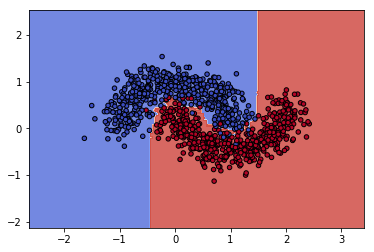

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=.2)
def make_meshgrid(x, y, h=.02):
    """
    根据特征向量，和网格间距参数，绘制网格点阵图
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    """绘制决策边界.

    Parameters
    ----------
    ax: 绘图对象
    clf: 分类模型
    xx: 特征数据点
    yy: 特征数据点
    params: 字典参数
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
X0, X1 = X[:, 0], X[:, 1]
plot_contours(plt,RandomForestClassifier(n_estimators=20).fit(X,y),*make_meshgrid(X0,X1),cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1,c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 参数网格寻优

In [3]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=RandomForestClassifier(
#                                                 min_samples_split=100
#                                                 ,min_samples_leaf=20
#                                                 ,max_depth=8
#                                                 ,oob_score=True
                                                )
                ,param_grid={"n_estimators":range(10,101,10)}
               ,scoring="roc_auc"
               ,cv=5)
gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [4]:
gs.best_params_,gs.best_score_

({'n_estimators': 100}, 0.9924399999999999)

# Adaboost
boosting系列算法中， Adaboost是最著名的算法之一。Adaboost既可以用作分类，也可以用作回归。

关键点：
1. 计算学习误差率$e$；
2. 计算弱学习器权重系数$α$；
3. 更新样本权重$D$；
4. 确定结合策略；
<img src="images/10ebb74ac1a0c5bf03f890f3502c9095_hd.jpg">

## Adaboost算法的基本思路
假设我们的训练集样本是$T=\{(x_,y_1),(x_2,y_2), ...(x_m,y_m)\}$,训练集的在第k个弱学习器的输出权重为$D(k) = (w_{k1}, w_{k2}, ...w_{km}) ;\;\; w_{1i}=\frac{1}{m};\;\; i =1,2...m$
### 分类问题
#### 误差率
分类问题的误差率很好理解和计算。由于多元分类是二元分类的推广，这里假设我们是二元分类问题，输出为{-1，1}，则第k个弱分类器$G_k(x)$在训练集上的加权误差率为$e_k = P(G_k(x_i) \neq y_i) = \sum\limits_{i=1}^{m}w_{ki}I(G_k(x_i) \neq y_i)$
#### 弱学习器权重系数
对于二元分类问题，第k个弱分类器$G_k(x)$的权重系数为$\alpha_k = \frac{1}{2}log\frac{1-e_k}{e_k}$。

从上式可以看出，如果分类误差率$e_k$越大，则对应的弱分类器权重系数$\alpha_k$越小。也就是说，误差率小的弱分类器权重系数越大。
#### 更新样本权重D
假设第k个弱分类器的样本集权重系数为$D(k) = (w_{k1}, w_{k2}, ...w_{km})$，则对应的第k+1个弱分类器的样本集权重系数为$$w_{k+1,i} = \frac{w_{ki}}{Z_K}exp(-\alpha_ky_iG_k(x_i))$$
这里$Z_k$是规范化因子$$Z_k = \sum\limits_{i=1}^{m}w_{ki}exp(-\alpha_ky_iG_k(x_i))$$

从$w_{k+1}$计算公式可以看出，如果第i个样本分类错误，则$y_iG_k(x_i) < 0$,导致样本的权重在第k+1个弱分类器中增大，如果分类正确，则权重在第k+1个弱分类器中减少。
#### 结合策略
Adaboost分类采用的是加权表决法。
### 回归问题
#### 误差率
对于第k个弱学习器，计算他在训练集上的最大误差$$E_k= max|y_i - G_k(x_i)|\;i=1,2...m$$
然后计算每个样本的相对误差$$e_{ki}= \frac{|y_i - G_k(x_i)|}{E_k}$$
这里是误差损失为线性时的情况，如果我们用平方误差，则$$e_{ki}= \frac{(y_i - G_k(x_i))^2}{E_k^2}$$，如果我们用的是指数误差，则$$e_{ki}= 1 - exp（\frac{-y_i + G_k(x_i))}{E_k}）$$
最终得到第k个弱学习器的 误差率$$e_k =  \sum\limits_{i=1}^{m}w_{ki}e_{ki}$$
#### 弱学习器权重系数
$$\alpha_k =\frac{e_k}{1-e_k}$$

#### 更新样本权重D
$$w_{k+1,i} = \frac{w_{ki}}{Z_k}\alpha_k^{1-e_{ki}}$$
规范化因子$$Z_k = \sum\limits_{i=1}^{m}w_{ki}\alpha_k^{1-e_{ki}}$$

#### 结合策略
加权的弱学习器取权重中位数对应的弱学习器作为强学习器的方法

## AdaBoost分类问题的损失函数优化
算法是通过一轮轮的弱学习器学习，利用前一个弱学习器的结果来更新后一个弱学习器的训练集权重。也就是说，第k-1轮的强学习器为$$f_{k-1}(x) = \sum\limits_{i=1}^{k-1}\alpha_iG_{i}(x)$$而第k轮的强学习器为$$f_{k}(x) = \sum\limits_{i=1}^{k}\alpha_iG_{i}(x)$$综合可以得到$$f_{k}(x) = f_{k-1}(x) + \alpha_kG_k(x)$$

Adaboost损失函数为指数函数，即定义损失函数为$$\underbrace{arg\;min\;}_{\alpha, G} \sum\limits_{i=1}^{m}exp(-y_if_{k}(x))$$,综合上式可得损失函数为$$(\alpha_k, G_k(x)) = \underbrace{arg\;min\;}_{\alpha, G}\sum\limits_{i=1}^{m}exp[(-y_i) (f_{k-1}(x) + \alpha G(x))]$$

令$w_{ki}^{’} = exp(-y_if_{k-1}(x))$，它的值不依赖于$\alpha, G$，因此与最小化无关，仅仅依赖于$f_{k-1}(x)$，随着每一轮迭代而改变。

将这个式子带入损失函数,损失函数转化为$$(\alpha_k, G_k(x)) = \underbrace{arg\;min\;}_{\alpha, G}\sum\limits_{i=1}^{m}w_{ki}^{’}exp[-y_i\alpha G(x)]$$

首先，我们求$G_k(x)$，可以得到$$G_k(x) = \underbrace{arg\;min\;}_{G}\sum\limits_{i=1}^{m}w_{ki}^{’}I(y_i \neq G(x_i))$$
将$G_k(x)$带入损失函数，并对$\alpha$求导,使其等于0，则就得到了$$\alpha_k = \frac{1}{2}log\frac{1-e_k}{e_k}$$其中，$e_k$即为我们前面的分类误差率。$$e_k = \frac{\sum\limits_{i=1}^{m}w_{ki}^{’}I(y_i \neq G(x_i))}{\sum\limits_{i=1}^{m}w_{ki}^{’}} = \sum\limits_{i=1}^{m}w_{ki}I(y_i \neq G(x_i))$$

最后看样本权重的更新。利用$$f_{k}(x) = f_{k-1}(x) + \alpha_kG_k(x)$$和$$w_{ki}^{’} = exp(-y_if_{k-1}(x))$$即可得：$$w_{k+1,i}^{’} = w_{ki}^{’}exp[-y_i\alpha_kG_k(x)]$$这样就得到了我们的样本权重更新公式。

## AdaBoost二元分类问题算法流程
输入为样本集$T=\{(x_,y_1),(x_2,y_2), ...(x_m,y_m)\}$，输出为{-1, +1}，弱分类器算法, 弱分类器迭代次数K

输出为最终的强分类器$f(x)$

1. 初始化样本集权重为$$D(1) = (w_{11}, w_{12}, ...w_{1m}) ;\;\; w_{1i}=\frac{1}{m};\;\; i =1,2...m$$
2. 迭代K次：
    1. 使用具有权重$D_k$的样本集来训练数据，得到弱分类器$G_k(x)$
    2. 计算$G_k(x)$的分类误差率$$e_k = P(G_k(x_i) \neq y_i) = \sum\limits_{i=1}^{m}w_{ki}I(G_k(x_i) \neq y_i)$$
    3. 计算弱分类器的系数$$\alpha_k = \frac{1}{2}log\frac{1-e_k}{e_k}$$
    4. 更新样本集的权重分布$$w_{k+1,i} = \frac{w_{ki}}{Z_K}exp(-\alpha_ky_iG_k(x_i)) \;\; i =1,2,...m$$,规范化因子,$$Z_k = \sum\limits_{i=1}^{m}w_{ki}exp(-\alpha_ky_iG_k(x_i))$$
3. 构建最终分类器
    
对于Adaboost多元分类算法，其实原理和二元分类类似，最主要区别在弱分类器的系数上。比如Adaboost SAMME算法，它的弱分类器的系数$$\alpha_k = \frac{1}{2}log\frac{1-e_k}{e_k} + log(R-1)$$，其中R为类别数。从上式可以看出，如果是二元分类，R=2，则上式和我们的二元分类算法中的弱分类器的系数一致。

## Adaboost回归问题的算法流程
输入为样本集$T=\{(x_,y_1),(x_2,y_2), ...(x_m,y_m)\}$，弱分类器算法, 弱分类器迭代次数K

输出为最终的强分类器$f(x)$

1. 初始化样本集权重为$$D(1) = (w_{11}, w_{12}, ...w_{1m}) ;\;\; w_{1i}=\frac{1}{m};\;\; i =1,2...m$$
2. 迭代K次：
    1. 使用具有权重$D_k$的样本集来训练数据，得到弱分类器$G_k(x)$
    2. 计算训练集上的最大误差$$E_k= max|y_i - G_k(x_i)|\;i=1,2...m$$
    3. 计算每个样本的相对误差:
        1. 如果是线性误差，则$e_{ki}= \frac{|y_i - G_k(x_i)|}{E_k}$;
        2. 如果是平方误差，则$e_{ki}= \frac{(y_i - G_k(x_i))^2}{E_k^2}$
        3. 如果是指数误差，则$e_{ki}= 1 - exp（\frac{-|y_i -G_k(x_i)|}{E_k}）$
    4. 计算回归误差率$$e_k =  \sum\limits_{i=1}^{m}w_{ki}e_{ki}$$
    5. 计算弱学习器的系数$$\alpha_k =\frac{e_k}{1-e_k}$$
    6. 更新样本集的权重分布为$$w_{k+1,i} = \frac{w_{ki}}{Z_k}\alpha_k^{1-e_{ki}}$$，规范化因子，$$Z_k = \sum\limits_{i=1}^{m}w_{ki}\alpha_k^{1-e_{ki}}$$
3. 构建最终强学习器

## Adaboost算法的正则化
为了防止Adaboost过拟合，我们通常也会加入正则化项，这个正则化项我们通常称为步长(learning rate)。定义为$ν$,对于前面的弱学习器的迭代$$f_{k}(x) = f_{k-1}(x) + \alpha_kG_k(x)$$如果我们加上了正则化项，则有$$f_{k}(x) = f_{k-1}(x) + \nu\alpha_kG_k(x)$$$ν$的取值范围为$0<ν≤1$。对于同样的训练集学习效果，较小的$ν$意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。

## Adaboost总结
优点：
1. Adaboost作为分类器时，分类精度很高
2. 在Adaboost的框架下，可以使用各种回归分类模型来构建弱学习器，非常灵活。
3. 作为简单的二元分类器时，构造简单，结果可理解。
4. 不容易发生过拟合

缺点：

1. 对异常样本敏感，异常样本在迭代中可能会获得较高的权重，影响最终的强学习器的预测准确性。

## scikit-learn的Adaboost类库
1. AdaBoostClassifier
2. AdaBoostRegressor

### 框架参数
1. base_estimator：弱学习器；
2. algorithm：这个参数只有AdaBoostClassifier有。SAMME和SAMME.R；
3. loss：这个参数只有AdaBoostRegressor有，用于计算误差率。有线性‘linear’, 平方‘square’和指数 ‘exponential’三种选择, 默认是线性，一般使用线性就足够了，除非你怀疑这个参数导致拟合程度不好；
4. n_estimators：弱学习器的最大迭代次数，或者说最大的弱学习器的个数；
5. learning_rate:每个弱学习器的权重缩减系数$ν$,见$f_{k}(x) = f_{k-1}(x) + \nu\alpha_kG_k(x)$

### 弱学习器参数
见具体的若学习器，例如：CART分类树DecisionTreeClassifier和CART回归树DecisionTreeRegressor
1. max_features；
2. max_depth；
3. min_samples_split；
4. min_samples_leaf;
5. min_weight_fraction_leaf;
6. max_leaf_nodes;

### 案例

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [6]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

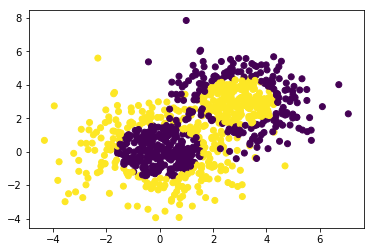

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [8]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                              

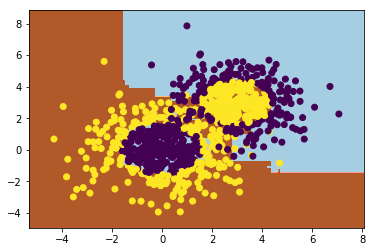

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [10]:
print("Score:", bdt.score(X,y))

Score: 0.9133333333333333


In [11]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9622222222222222


In [12]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.8944444444444445


In [13]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9611111111111111


# GBDT
## 概述
梯度提升树(Gradient Boosting Decison Tree, 以下简称GBDT)也是集成学习Boosting家族的成员，但是却和传统的Adaboost有很大的不同。Adaboost，是利用前一轮迭代弱学习器的误差率来更新训练集的权重，这样一轮轮的迭代下去。GBDT也是迭代，但是使用了前向分布算法，弱学习器限定了只能使用CART回归树模型，同时迭代思路和Adaboost也有所不同。

在GBDT的迭代中，假设我们前一轮迭代得到的强学习器是$f_{t-1}(x)$，损失函数是$L(y, f_{t-1}(x))$，本轮迭代的目的是找到一个CART回归树模型的弱学习器$h_t(x)$，让本轮的损失函数$L(y, f_{t}(x)) =L(y, f_{t-1}(x)+ h_t(x))$最小。也就是说，本轮迭代找到决策树，要让样本的损失尽量变得更小。
<img src="images/v2-55cee3e8fa13348b316543b50093d91f_b.jpg">
GBDT的思想可以用一个通俗的例子解释，假如有个人30岁，我们首先用20岁去拟合，发现损失有10岁，这时我们用6岁去拟合剩下的损失，发现差距还有4岁，第三轮我们用3岁拟合剩下的差距，差距就只有一岁了。如果我们的迭代轮数还没有完，可以继续迭代下面，每一轮迭代，拟合的岁数误差都会减小。
## 算法流程
<img src="images/equation.svg">

## 常用损失函数
### 分类算法
1. 如果是指数损失函数，则损失函数表达式为$L(y, f(x)) = exp(-yf(x))$
2. 如果是对数损失函数:
    1. 二元分类：$L(y, f(x)) = log(1+ exp(-yf(x)))$
    2. 多元分类：$L(y, f(x)) = -  \sum\limits_{k=1}^{K}y_klog\;p_k(x)$
    
### 回归算法
1. 均方差:$L(y, f(x)) =(y-f(x))^2$;
2. 绝对损失:$L(y, f(x)) =|y-f(x)|$;
3. Huber损失,它是均方差和绝对损失的折衷产物，对于远离中心的异常点，采用绝对损失，而中心附近的点采用均方差。这个界限一般用分位数点度量。损失函数如下：$L(y, f(x))= \begin{cases} \frac{1}{2}(y-f(x))^2& {|y-f(x)| \leq \delta}\\ \delta(|y-f(x)| - \frac{\delta}{2})& {|y-f(x)| > \delta} \end{cases}$;
4. 分位数损失,它对应的是分位数回归的损失函数，表达式为$L(y, f(x)) =\sum\limits_{y \geq f(x)}\theta|y - f(x)| + \sum\limits_{y < f(x)}(1-\theta)|y - f(x)|$

Huber损失和分位数损失，主要用于健壮回归，也就是减少异常点对损失函数的影响。

## 正则化
和Adaboost一样，我们也需要对GBDT进行正则化，防止过拟合。GBDT的正则化主要有三种方式。

第一种是和Adaboost类似的正则化项，即步长(learning rate)。定义为$ν$,对于前面的弱学习器的迭代$$f_{k}(x) = f_{k-1}(x) + h_k(x)$$如果我们加上了正则化项，则有$$f_{k}(x) = f_{k-1}(x) + \nu h_k(x)$$

$ν$的取值范围为$0<ν≤1$。对于同样的训练集学习效果，较小的$ν$意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。

第二种正则化的方式是通过子采样比例（subsample）。取值为(0,1]。**这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。**如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间。

使用了子采样的GBDT有时也称作随机梯度提升树(Stochastic Gradient Boosting Tree, SGBT)。由于使用了子采样，程序可以通过采样分发到不同的任务去做boosting的迭代过程，最后形成新树，从而减少弱学习器难以并行学习的弱点。

第三种是对于弱学习器即CART回归树进行正则化剪枝。

## GBDT小结
优点：
1.  可以灵活处理各种类型的数据，包括连续值和离散值。
2.  相对SVM来说,在相对少的调参时间情况下，预测的准确率也可以比较高。
3.  使用一些健壮的损失函数，对异常值的鲁棒性非常强。如 Huber损失函数和Quantile损失函数。

缺点:
1. 弱学习器之间存在依赖关系，难以并行训练数据(不过可以通过自采样的SGBT来达到部分并行)。

## scikit-learn中的GBDT类库
### 概述
1. GradientBoostingClassifier；
2. GradientBoostingRegressor；

### 框架参数
1. n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。
2. learning_rate: 即每个弱学习器的权重缩减系数$ν$，也称作步长.
3. subsample：取值为(0,1]。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间，默认是1.0，即不使用子采样。
4. init: 即我们的初始化的时候的弱学习器$f_0(x)$，如果不输入，则用训练集样本来做样本集的初始化分类回归预测。否则用init参数提供的学习器做初始化分类回归预测。
5. loss: 即我们GBDT算法中的损失函数。对于分类模型，有对数似然损失函数"deviance"和指数损失函数"exponential"两者输入选择。默认是对数似然损失函数"deviance"。对于回归模型，有均方差"ls", 绝对损失"lad", Huber损失"huber"和分位数损失“quantile”。默认是均方差"ls"。
6. alpha：这个参数只有GradientBoostingRegressor有，当我们使用Huber损失"huber"和分位数损失“quantile”时，需要指定分位数的值。默认是0.9，如果噪音点较多，可以适当降低这个分位数的值。

### 弱学习器参数
GBDT使用了CART回归决策树，因此它的参数基本来源于决策树类.

### 案例

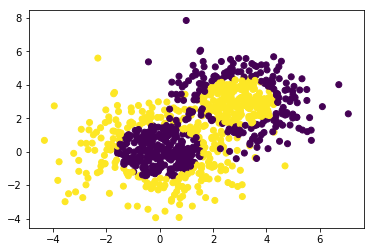

In [14]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

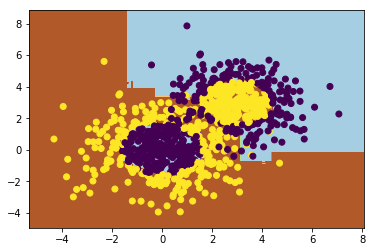

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gbm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [17]:
from sklearn import metrics
gbm.score(X,y),metrics.accuracy_score(y,gbm.predict(X))

(0.9422222222222222, 0.9422222222222222)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
gs=GridSearchCV(estimator=GradientBoostingClassifier(),scoring="accuracy",param_grid={'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1]})
gs.fit(X,y)

d:\pp\Miniconda3\envs\pythonlearn\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [20]:
gs.best_params_,gs.best_score_

({'subsample': 0.7}, 0.8633333333333333)

In [21]:
gbm=GradientBoostingClassifier(subsample=.75)
gbm.fit(X,y)
metrics.accuracy_score(y,gbm.predict(X))

0.9633333333333334

In [22]:
gs=GridSearchCV(estimator=GradientBoostingClassifier(subsample=.75),scoring="accuracy",param_grid={'n_estimators':range(50,121,10)})
gs.fit(X,y)

d:\pp\Miniconda3\envs\pythonlearn\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [23]:
gs.best_params_,gs.best_score_

({'n_estimators': 110}, 0.8655555555555555)

In [24]:
gbm=GradientBoostingClassifier(subsample=.7,n_estimators=120)
gbm.fit(X,y)
metrics.accuracy_score(y,gbm.predict(X))

0.9711111111111111

# xgboost
## 概述
Xgboost是GBDT算法的高效实现，有效应用了数值优化，损失函数更复杂。目标函数依然是所有树的预测值相加等于预测值。

总体来说，xgboost相比于gbdt的有很多创新之处：
1. 传统GBDT以CART作为基分类器，xgboost还支持线性分类器，这个时候xgboost相当于带L1和L2正则化项的逻辑斯蒂回归（分类问题）或者线性回归（回归问题）。
2. 传统GBDT在优化时只用到一阶导数信息，xgboost则对代价函数进行了二阶泰勒展开，同时用到了一阶和二阶导数（xgboost工具支持自定义代价函数，只要函数可一阶和二阶求导。）
3. xgboost在代价函数里加入了正则项，用于控制模型的复杂度。正则项里包含了树的叶子节点个数、每个叶子节点上输出的score的L2模的平方和。从方差和偏差的角度来讲，正则项降低了模型的偏差，使学习出来的模型更加简单，防止过拟合，这也是xgboost优于传统GBDT的一个特性。
4. Shrinkage（缩减），相当于学习速率（xgboost中的eta）。每次迭代，增加新的模型，在前面乘以一个小于1的系数，降低优化的速度，这样每次走一小步逐步逼近最优模型比每次走一大步逼近更加容易避免过拟合现象；
5. 列抽样（column subsampling）。xgboost借鉴了随机森林的做法，支持列抽样（即每次的输入特征不是全部特征），不仅能降低过拟合，还能减少计算，这也是xgboost异于传统gbdt的一个特性。
6. 忽略缺失值：在寻找splitpoint的时候，不会对该特征为missing的样本进行遍历统计，只对该列特征值为non-missing的样本上对应的特征值进行遍历，通过这个工程技巧来减少了为稀疏离散特征寻找splitpoint的时间开销；
7. 指定缺失值的分隔方向：可以为缺失值或者指定的值指定分支的默认方向，为了保证完备性，会分别处理将missing该特征值的样本分配到左叶子结点和右叶子结点的两种情形，分到那个子节点带来的增益大，默认的方向就是哪个子节点，这能大大提升算法的效率。
8. 并行化处理：在训练之前，预先对每个特征内部进行了排序找出候选切割点，然后保存为block结构，后面的迭代中重复地使用这个结构，大大减小计算量。在进行节点的分裂时，需要计算每个特征的增益，最终选增益最大的那个特征去做分裂，那么各个特征的增益计算就可以开多线程进行，即在不同的特征属性上采用多线程并行方式寻找最佳分割点。

## 案例
注意：xgboost没有在sklearn中的实现，需要安装：pip install xgboost

In [25]:
from xgboost import XGBClassifier

In [26]:
xgb=XGBClassifier()
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

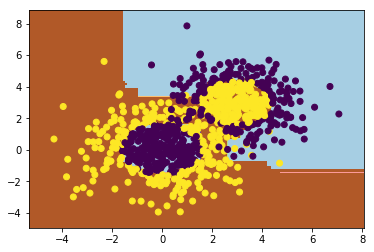

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = xgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [28]:
xgb.score(X,y)

0.9355555555555556